**Import the Dataset**

Importing dataset directly from the link provided

In [1]:
!wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip

--2022-10-23 16:26:49--  https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
Resolving unimibox.unimi.it (unimibox.unimi.it)... 159.149.53.190
Connecting to unimibox.unimi.it (unimibox.unimi.it)|159.149.53.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘CatsDogs.zip’

CatsDogs.zip            [              <=>   ] 812.79M   945KB/s    in 7m 44s  

2022-10-23 16:34:35 (1.75 MB/s) - ‘CatsDogs.zip’ saved [852272294]



**Import Libraryies** 

import required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
import tensorflow as tf
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

**Extract File**

In [4]:
# import required modules
import zipfile
import io
from zipfile import ZipFile
# read the dataset using the compression zip

with ZipFile('CatsDogs.zip', 'r') as CatsDogs:
   # Extract all the contents of zip file in current directory
   CatsDogs.extractall()

**Checking The files Extracted**

In [5]:
print(len(os.listdir('/content/CatsDogs/Cats/')))
print(len(os.listdir('/content/CatsDogs/Dogs/')))
# Expected Output:
# 12500
# 12500

12500
12500


**Create directories**

In [6]:
# Use os.mkdir to create the directories
# we will need a directory for CatsDogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'Cats' and 'Dogs'

to_create = [
    '/content/CatsDogs',
    '/content/CatsDogs/train',
    '/content/CatsDogs/test',
    '/content/CatsDogs/train/Cats',
    '/content/CatsDogs/train/Dogs',
    '/content/CatsDogs/test/Cats',
    '/content/CatsDogs/test/Dogs'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/content/CatsDogs failed
/content/CatsDogs/train created
/content/CatsDogs/test created
/content/CatsDogs/train/Cats created
/content/CatsDogs/train/Dogs created
/content/CatsDogs/test/Cats created
/content/CatsDogs/test/Dogs created


**Renaming both file names of cats and dogs**

In [7]:
#renaming both file names of cats and dogs 
 
# importing os module
import os
import pathlib 
# Function to rename multiple files
def rename_main():
    path=pathlib.Path('.')/"CatsDogs"

    for folder in path.iterdir():
        if folder.is_dir():
            counter=0
            for file in folder.iterdir():
                if file.is_file():
                    new_file=folder.name+'.'+str(counter)+'.jpg'
                    file.rename(path/folder.name/new_file)
                    counter+=1 
# Driver Code
if __name__ == '__main__':
     
    # Calling main() function
    rename_main()

**Spliting Dataset into Train and Test**

In [8]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is CatsDogs/Cat, and SPLIT SIZE is .8
# Then 80% of the images in CatsDogs/Cat will be copied to the TRAINING dir
# and 20% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

CAT_SOURCE_DIR = r"/content/CatsDogs/Cats/"
TRAINING_CATS_DIR = r"/content/CatsDogs/train/Cats/"
TESTING_CATS_DIR = r"/content/CatsDogs/test/Cats/"
DOG_SOURCE_DIR = r"/content/CatsDogs/Dogs/"
TRAINING_DOGS_DIR = r"/content/CatsDogs/train/Dogs/"
TESTING_DOGS_DIR = r"/content/CatsDogs/test/Dogs/"

split_size = .8
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 2842.jpg is zero length, so ignoring
# 3809.jpg is zero length, so ignoring

Cats.6871.jpg is zero length, so ignoring
Dogs.6197.jpg is zero length, so ignoring


**Checking The Train and Test Files**

In [9]:
print(len(os.listdir('/content/CatsDogs/train/Cats/')))
print(len(os.listdir('/content/CatsDogs/train/Dogs/')))
print(len(os.listdir('/content/CatsDogs/test/Cats/')))
print(len(os.listdir('/content/CatsDogs/test/Dogs/')))

# Expected output:
# 9999
# 9999
# 2500
# 2500

9999
9999
2500
2500


**Check Bad Image File**

checking 0 bit image files ,wrong file format....

In [10]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/content/CatsDogs").rglob("*.jpg")
for img_b in path:
    try:
        img = PIL.Image.open(img_b)
    except PIL.UnidentifiedImageError:
            print(img_b)

/content/CatsDogs/Cats/Cats.6871.jpg
/content/CatsDogs/Dogs/Dogs.6197.jpg


In [11]:
import os
os.remove("/content/CatsDogs/Cats/Cats.6871.jpg") 
os.remove("/content/CatsDogs/Dogs/Dogs.6197.jpg")

**Labeling The Images**

In [12]:
input_path = []
label = []

for class_name in os.listdir("CatsDogs"):
    for path in os.listdir("CatsDogs/"+class_name):
        if class_name == 'Cats':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("CatsDogs", class_name, path))
print(input_path[0], label[0])

CatsDogs/Cats/Cats.8543.jpg 0


**Checking the Image Labels**

In [13]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)  # shuffling the data
df.head()

images  label
0  CatsDogs/Dogs/Dogs.5222.jpg      1
1  CatsDogs/Dogs/Dogs.3267.jpg      1
2  CatsDogs/Dogs/Dogs.6256.jpg      1
3  CatsDogs/Dogs/Dogs.9568.jpg      1
4  CatsDogs/Cats/Cats.1409.jpg      0

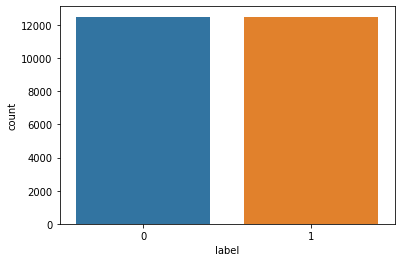

In [14]:
import seaborn as sns
sns.countplot(df['label'])

**Visualizing the Images**

Plotting Dogs Images

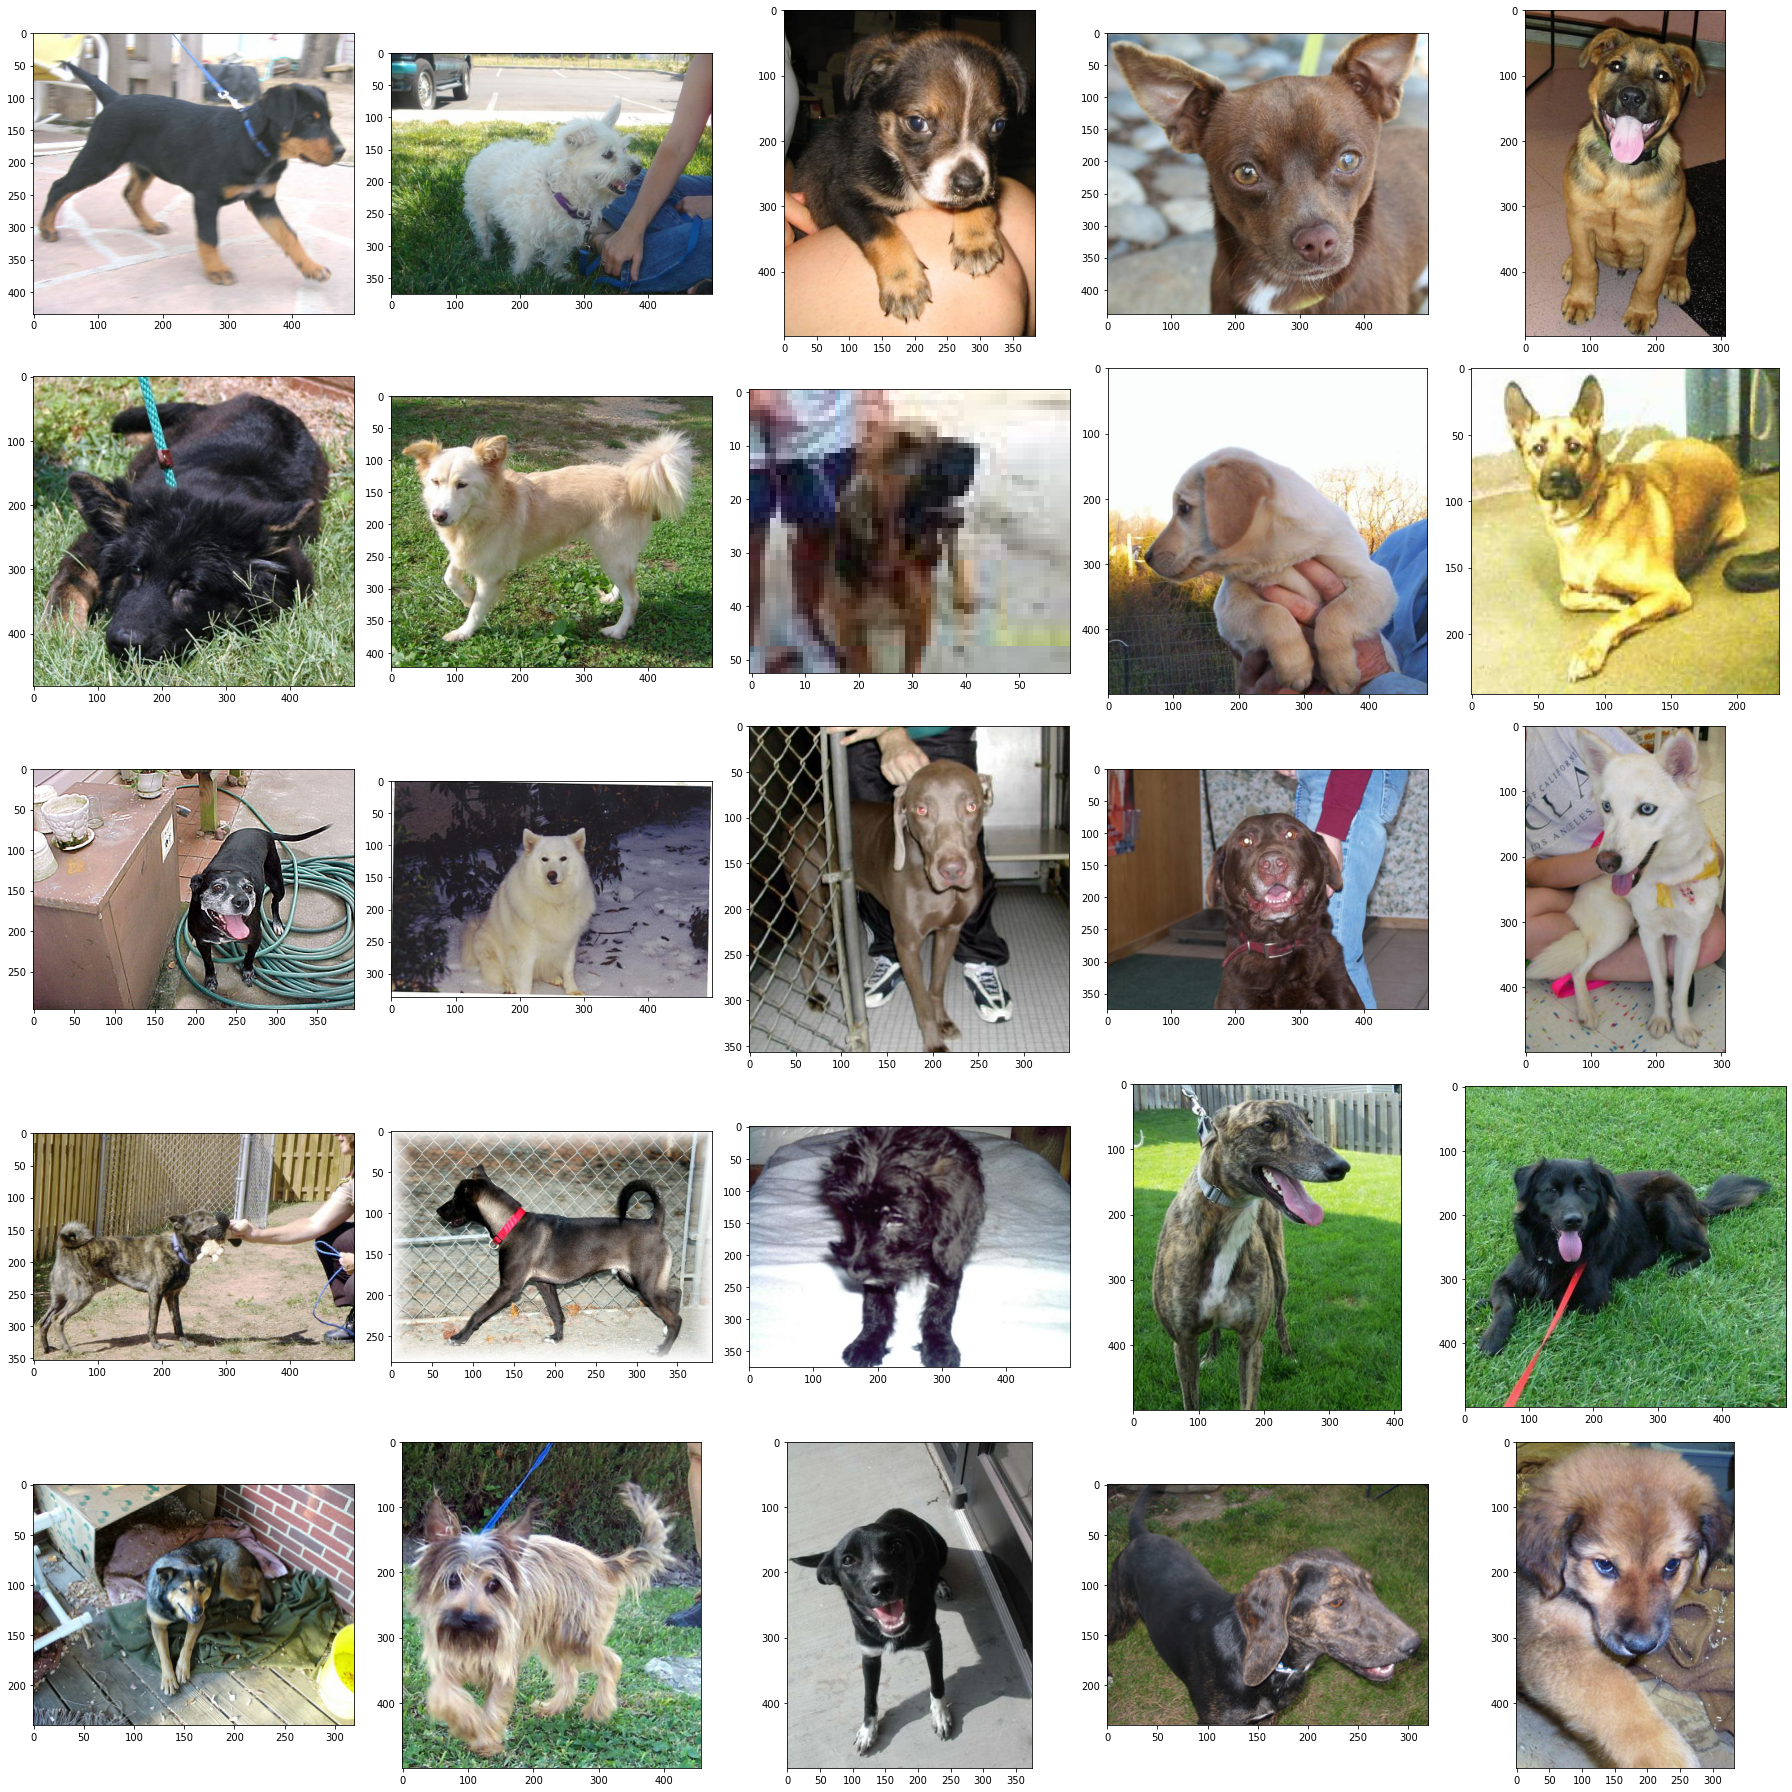

In [15]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
plt.tight_layout()
plt.show()

Plotting Cats Images

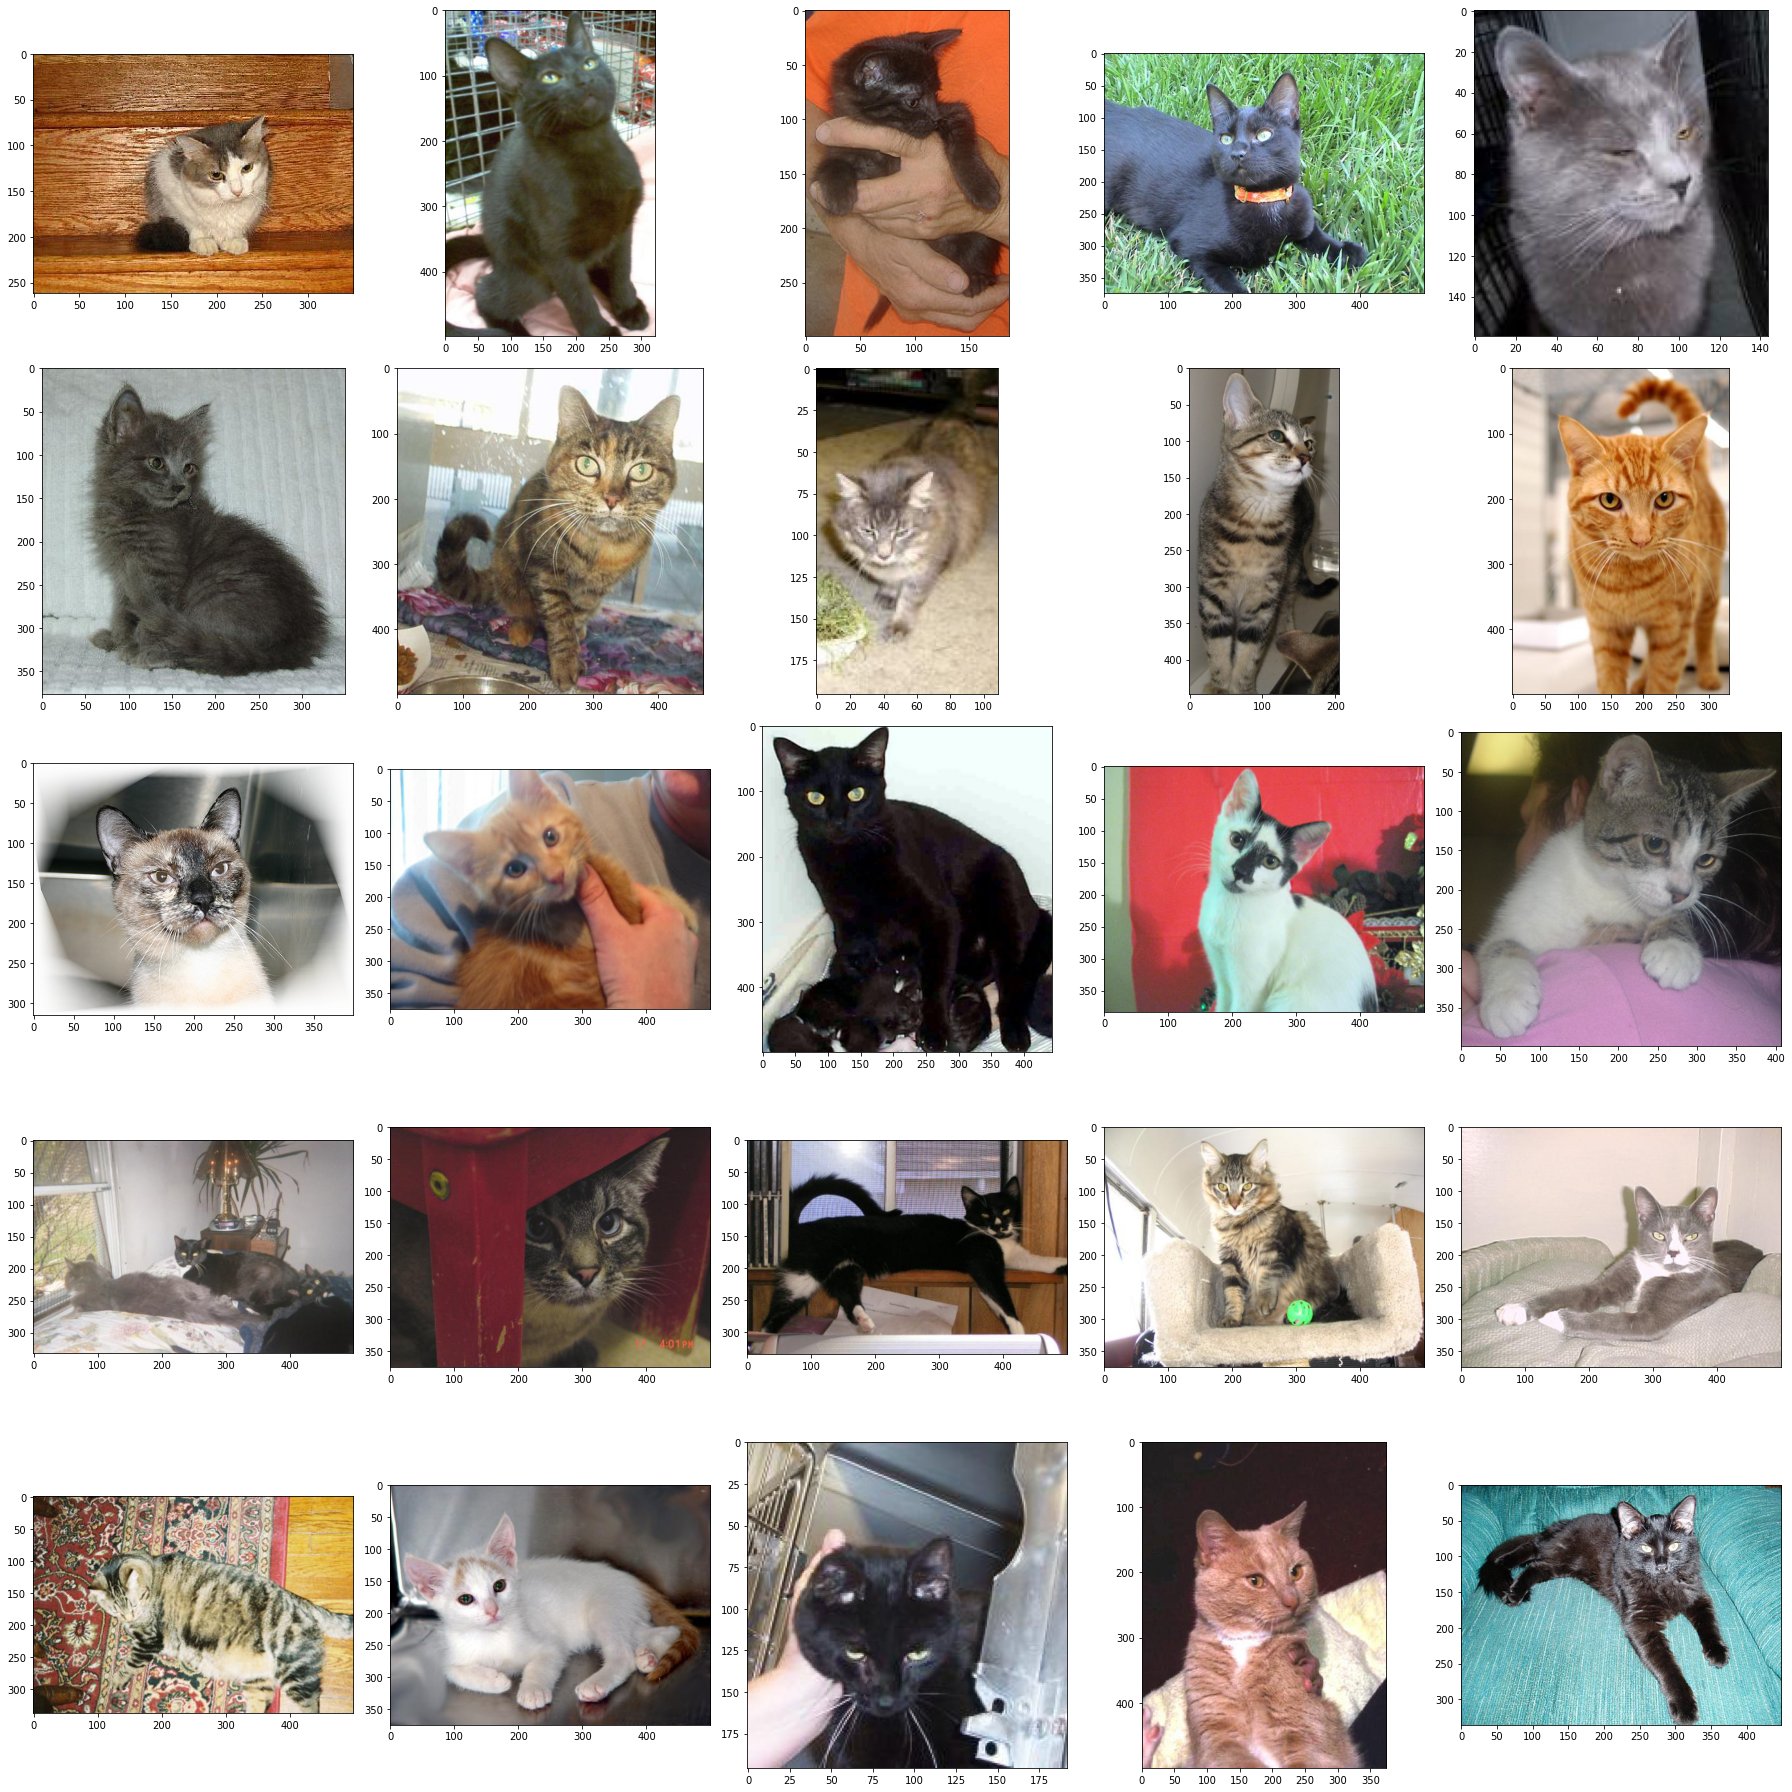

In [16]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
plt.tight_layout()
plt.show()

**Create the Neural Network model**

**Baseline Model**

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
> 79.140


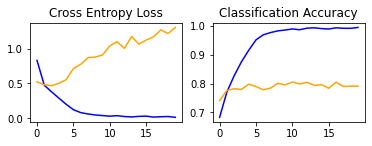

In [17]:
import sys
from matplotlib import pyplot
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
# define cnn baseline model 

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model
# plot diagnostic learning curves
def summarize_Plot(history):
    # plot loss
    pyplot.subplot(221)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory('CatsDogs/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
     # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_Plot(history)

# entry point, run the test harness
run_test_harness()


**Regulazation**

baseline model with dropout for the dogs vs cats dataset

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
> 85.860


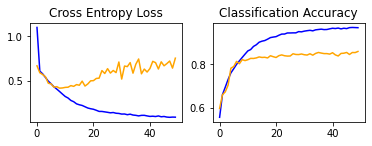

In [18]:
# baseline model with dropout for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
# plot diagnostic learning curves
def summarize_Plot(history):
    # plot loss
    pyplot.subplot(221)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterator
	train_it = datagen.flow_from_directory('CatsDogs/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('CatsDogs/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_Plot(history)

# entry point, run the test harness
run_test_harness()

**Baseline Model with Data Augmentation** 

In [19]:
# baseline model with data augmentation for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_Plot(history):
    # plot loss
    pyplot.subplot(221)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,rotation_range = 15,
        width_shift_range=0.1,zoom_range=0.2, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('CatsDogs/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_Plot(history)

# entry point, run the test harness
run_test_harness()

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
> 93.560


**VGG16 Model**

In [20]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def model_TL():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_Plot(history):
    # plot loss
    pyplot.subplot(221)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
        # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def eval_model():
    # define model
    model = model_TL()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('CatsDogs/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_Plot(history)

# entry point, run the test harness
eval_model()

58889256/58889256 [==============================] - 0s 0us/step
Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
313/313 [==============================] - 108s 342ms/step - loss: 0.5704 - accuracy: 0.9570 - val_loss: 0.0790 - val_accuracy: 0.9696
Epoch 2/10
313/313 [==============================] - 105s 337ms/step - loss: 0.0376 - accuracy: 0.9864 - val_loss: 0.0642 - val_accuracy: 0.9802
Epoch 3/10
313/313 [==============================] - 105s 337ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0915 - val_accuracy: 0.9796
Epoch 4/10
313/313 [==============================] - 105s 336ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0929 - val_accuracy: 0.9800
Epoch 5/10
313/313 [==============================] - 105s 334ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 0.0934 - val_accuracy: 0.9806
Epoch 6/10
313/313 [==============================] - 104s 334ms/step - loss: 5.7512e-04 - accuracy: 0.9998 - val_loss: 

**VGG19 Model**

80134624/80134624 [==============================] - 0s 0us/step
Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
313/313 [==============================] - 106s 338ms/step - loss: 0.3951 - accuracy: 0.9632 - val_loss: 0.0888 - val_accuracy: 0.9692
Epoch 2/10
313/313 [==============================] - 105s 334ms/step - loss: 0.0235 - accuracy: 0.9919 - val_loss: 0.0686 - val_accuracy: 0.9808
Epoch 3/10
313/313 [==============================] - 105s 334ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0747 - val_accuracy: 0.9806
Epoch 4/10
313/313 [==============================] - 105s 334ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0795 - val_accuracy: 0.9810
Epoch 5/10
313/313 [==============================] - 105s 334ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0826 - val_accuracy: 0.9818
Epoch 6/10
313/313 [==============================] - 105s 335ms/step - loss: 6.2511e-04 - accuracy: 0.9997 - val_loss: 

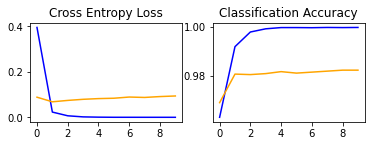

In [21]:
#vgg19 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def model_TL():
    # load model
    model = VGG19(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_Plot(history):
    # plot loss
    pyplot.subplot(221)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
        # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def eval_model():
    # define model
    model = model_TL()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('CatsDogs/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_Plot(history)

# entry point, run the test harness
eval_model()

**ResNet50 Model**

94765736/94765736 [==============================] - 0s 0us/step
Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
313/313 [==============================] - 109s 338ms/step - loss: 0.2643 - accuracy: 0.9620 - val_loss: 0.0536 - val_accuracy: 0.9810
Epoch 2/10
313/313 [==============================] - 104s 333ms/step - loss: 0.0515 - accuracy: 0.9819 - val_loss: 0.0420 - val_accuracy: 0.9842
Epoch 3/10
313/313 [==============================] - 104s 334ms/step - loss: 0.0419 - accuracy: 0.9848 - val_loss: 0.0399 - val_accuracy: 0.9850
Epoch 4/10
313/313 [==============================] - 104s 333ms/step - loss: 0.0295 - accuracy: 0.9886 - val_loss: 0.0426 - val_accuracy: 0.9846
Epoch 5/10
313/313 [==============================] - 104s 334ms/step - loss: 0.0362 - accuracy: 0.9870 - val_loss: 0.0381 - val_accuracy: 0.9858
Epoch 6/10
313/313 [==============================] - 104s 333ms/step - loss: 0.0250 - accuracy: 0.9911 - val_loss: 0.03

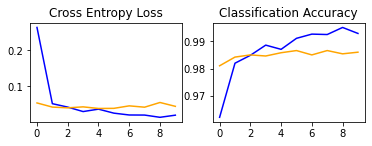

In [29]:
import sys
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from matplotlib import pyplot
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def model_TL():
    # load model
    model = ResNet50(include_top=False, weights='imagenet', pooling='max')
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_Plot(history):
    # plot loss
    pyplot.subplot(221)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
        # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def eval_model():
    # define model
    model = model_TL()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('CatsDogs/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_Plot(history)

# entry point, run the test harness
eval_model()


**EfficentNetB0 Model**

16705208/16705208 [==============================] - 0s 0us/step
Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
313/313 [==============================] - 113s 339ms/step - loss: 0.2612 - accuracy: 0.8987 - val_loss: 0.1844 - val_accuracy: 0.9236
Epoch 2/10
313/313 [==============================] - 105s 334ms/step - loss: 0.1327 - accuracy: 0.9433 - val_loss: 0.1864 - val_accuracy: 0.9268
Epoch 3/10
313/313 [==============================] - 105s 334ms/step - loss: 0.0880 - accuracy: 0.9644 - val_loss: 0.2098 - val_accuracy: 0.9266
Epoch 4/10
313/313 [==============================] - 104s 333ms/step - loss: 0.0710 - accuracy: 0.9723 - val_loss: 0.2312 - val_accuracy: 0.9256
Epoch 5/10
313/313 [==============================] - 104s 334ms/step - loss: 0.0631 - accuracy: 0.9750 - val_loss: 0.2480 - val_accuracy: 0.9254
Epoch 6/10
313/313 [==============================] - 104s 334ms/step - loss: 0.0587 - accuracy: 0.9793 - val_loss: 0.28

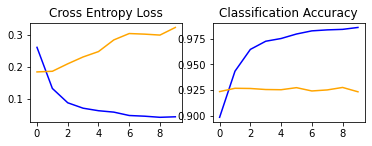

In [30]:
import sys
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.python.keras.models import Sequential
from matplotlib import pyplot
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def model_TL():
    # load model
    model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_Plot(history):
    # plot loss
    pyplot.subplot(221)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(222)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
        # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def eval_model():
    # define model
    model = model_TL()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('CatsDogs/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_Plot(history)

# entry point, run the test harness
eval_model()


**Save Final Model VGG16**

In [33]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def model_vgg16():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def eval_model():
# define model
    model = model_vgg16()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_model16.h5')

# entry point, run the test harness
eval_model()

Found 19998 images belonging to 2 classes.


**Save the final model of VGG19**

In [32]:
# save the final model to file
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def model_vgg19():
    # load model
    model = VGG19(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def eval_model():
# define model
    model = model_vgg19()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_model19.h5')

# entry point, run the test harness
eval_model()

Found 19998 images belonging to 2 classes.


**Save the final model of Resnet50**

In [34]:
# save the final model to file
from tensorflow.keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def model_resetnet():
    # load model
    model = ResNet50(include_top=False, weights='imagenet', pooling='max')
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def eval_model():
# define model
    model = model_vgg19()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    # prepare iterator
    train_it = datagen.flow_from_directory('CatsDogs/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_modelresnet.h5')

# entry point, run the test harness
eval_model()

Found 19998 images belonging to 2 classes.


**Make Prediction with VGG16**

In [35]:
# make a prediction for a new image.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample2.jpg')
     # load model
    model = load_model('final_model16.h5')
     # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 342ms/step
[4.13669e-36]


In [54]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample2.jpg')
     # load model
    model = load_model('final_model16.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 139ms/step
probability = 1.0
Prediction = Cat
[4.13669e-36]


In [55]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('img2.jpg')
     # load model
    model = load_model('final_model16.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 140ms/step
probability = 1.0
[1.]


In [36]:
# make a prediction for a new image.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('img2.jpg')
     # load model
    model = load_model('final_model16.h5')
     # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 141ms/step
[1.]


Probability Prediction VGG16

In [37]:
 # load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic1.jpg')
     # load model
    model = load_model('final_model16.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 139ms/step
probability = 0.9999999979801386
Prediction = Cat
[2.0198614e-09]


In [38]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic5.jpg')
     # load model
    model = load_model('final_model16.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 140ms/step
probability = 0.9999999999999919
Prediction = Cat
[8.0805994e-15]


In [39]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample_image.jpg')
     # load model
    model = load_model('final_model16.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 141ms/step
probability = 1.0
[1.]


**Make Prediction with VGG19**

In [40]:
# make a prediction for a new image.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample_image.jpg')
     # load model
    model = load_model('final_model19.h5')
     # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 155ms/step
[1.]


In [41]:
# make a prediction for a new image.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic1.jpg')
     # load model
    model = load_model('final_model19.h5')
     # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 153ms/step
[0.00182135]


In [42]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('img2.jpg')
     # load model
    model = load_model('final_model19.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 158ms/step
probability = 1.0
Prediction = Dog
[1.]


In [43]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic5.jpg')
     # load model
    model = load_model('final_model19.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 160ms/step
probability = 0.9999999999119215
Prediction = Cat
[8.807855e-11]


In [44]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample2.jpg')
     # load model
    model = load_model('final_model19.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 159ms/step
probability = 1.0
Prediction = Cat
[0.]


In [56]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic1.jpg')
     # load model
    model = load_model('final_model19.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 161ms/step
probability = 0.9981786521384493
Prediction = Cat
[0.00182135]


In [57]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample_image.jpg')
     # load model
    model = load_model('final_model19.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 160ms/step
probability = 1.0
Prediction = Dog
[1.]


**Make Prediction with Resnet50**

In [45]:
# make a prediction for a new image.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img  - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample2.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 161ms/step
[7.0569914e-35]


In [46]:
# make a prediction for a new image.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample_image.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 159ms/step
[1.]


In [47]:
# make a prediction for a new image.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic1.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

1/1 [==============================] - 0s 159ms/step
[3.9569096e-07]


In [48]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample_image.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 161ms/step
probability = 1.0
Prediction = Dog
[1.]


In [49]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('sample2.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 163ms/step
probability = 1.0
Prediction = Cat
[7.0569914e-35]


In [50]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic5.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 164ms/step
probability = 1.0
Prediction = Cat
[9.631084e-22]


In [51]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('img2.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 166ms/step
probability = 1.0
Prediction = Dog
[1.]


In [58]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic1.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 160ms/step
probability = 0.9999996043090391
Prediction = Cat
[3.9569096e-07]


In [59]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
     # load the image
    img = load_image('pic5.jpg')
     # load model
    model = load_model('final_modelresnet.h5')
     # predict the class
    result = model.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'Cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result[0])

# entry point, run the example
run_example()


1/1 [==============================] - 0s 162ms/step
probability = 1.0
Prediction = Cat
[9.631084e-22]
